# Analysis of recall by output position

This notebook demonstrates how to run a probability of nth recall (PNR) analysis. It creates serial position curves that are conditionalized on output position. For example, this analysis for the first output position gives a probability of first recall (PFR) curve, which shows that probability of initiating recall at each serial position.

Currently, repeats and intrusions are skipped and not counted toward output position. That could be changed in the future by adding an option, so that output position is incremented regardless of whether a recall is valid or not.

See `demo_recall.ipynb` for an explanation of the dataset.

In [1]:
import seaborn as sns
from psifr import fr

## Load free recall data

In [2]:
raw = fr.sample_data("Morton2013")
data = fr.merge_free_recall(raw)

## Calculate PNR curves

In [3]:
results = fr.pnr(data)
results

prob  actual  possible
subject output input                            
1       1      1      0.000000       0        48
               2      0.020833       1        48
               3      0.000000       0        48
               4      0.000000       0        48
               5      0.000000       0        48
...                        ...     ...       ...
47      24     20          NaN       0         0
               21          NaN       0         0
               22          NaN       0         0
               23          NaN       0         0
               24          NaN       0         0

[23040 rows x 3 columns]

## Plot the first three output positions

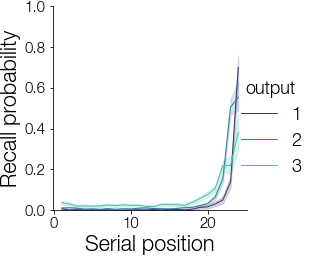

In [4]:
pfr = results.query('output <= 3')
palette = sns.color_palette('mako', 3)
g = fr.plot_spc(pfr.reset_index(), hue='output', palette=palette, height=4)
g.add_legend();

## Plot all output positions

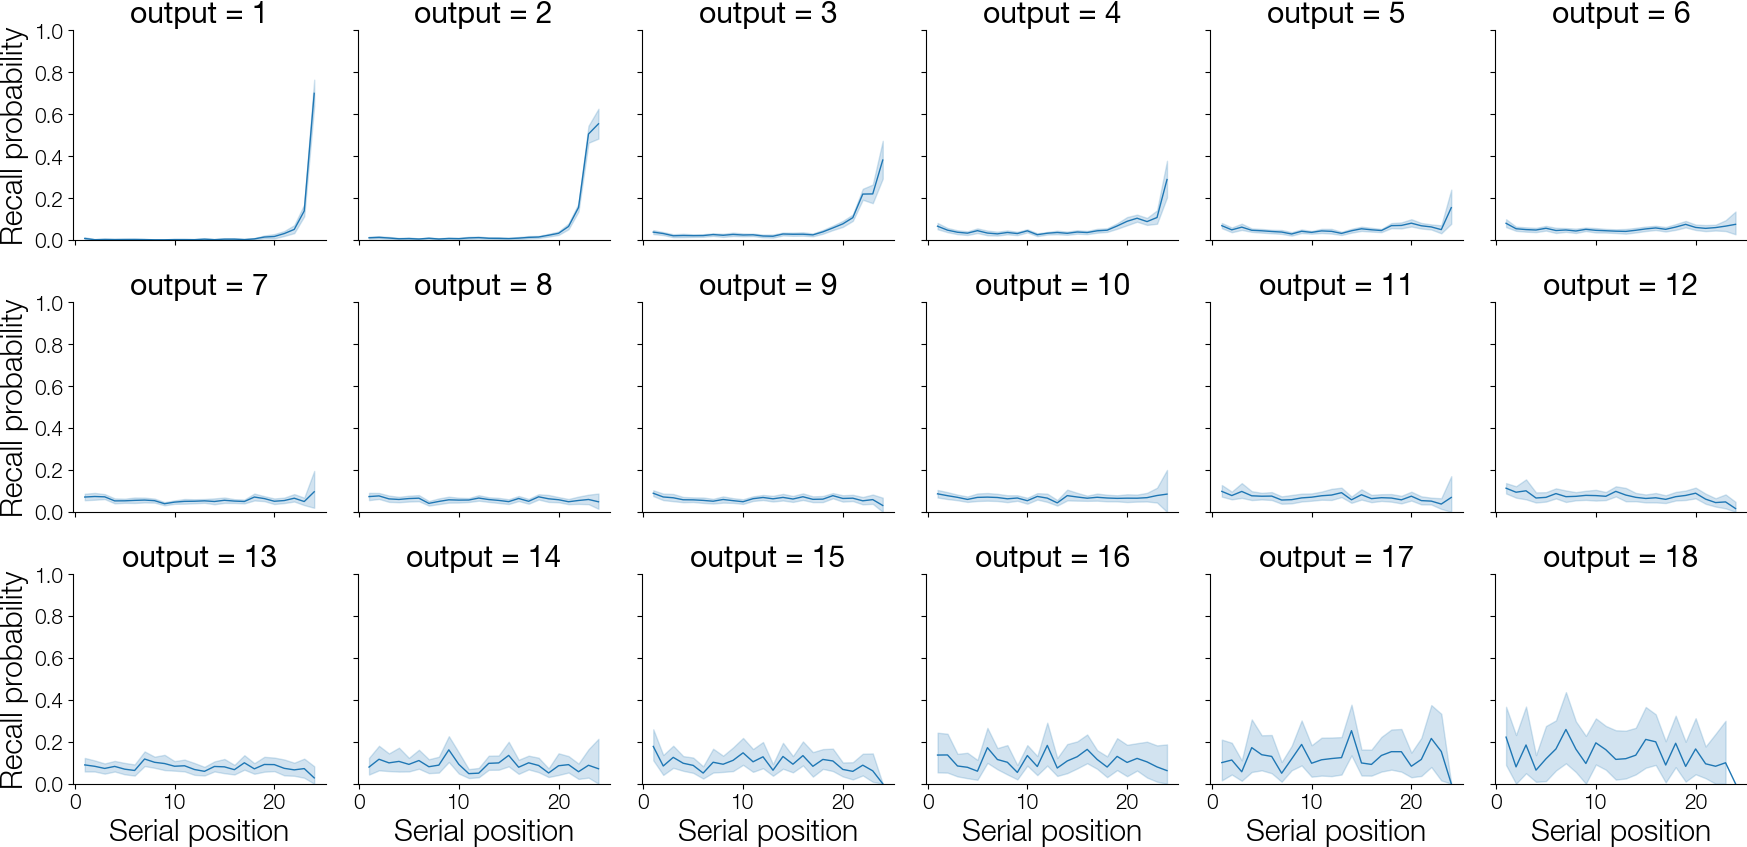

In [5]:
g = fr.plot_spc(results.query("output <= 18"), col="output", col_wrap=6)

In [6]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

psifr  : 0.8.1
seaborn: 0.11.2

